In [1]:
import numpy as np
from scipy.spatial.distance import pdist

from IPython.display import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt

%matplotlib inline

# (a)

In [2]:
# !wget http://cs229.stanford.edu/ps/ps3/mandrill-small.tiff
# !wget http://cs229.stanford.edu/ps/ps3/mandrill-large.tiff

In [3]:
im_large = imread('./mandrill-large.tiff')

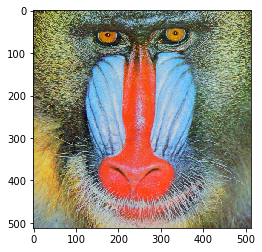

In [4]:
plt.imshow(im_large)

In [5]:
im_large.shape

(512, 512, 3)

In [6]:
im_small = imread('./mandrill-small.tiff')

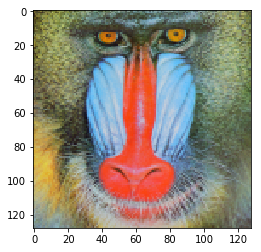

In [7]:
plt.imshow(im_small)

# (b)

In [8]:
X = im_small.reshape(-1, 3)

In [9]:
X.shape

(16384, 3)

In [10]:
num_clusters = 16

In [11]:
X.shape

(16384, 3)

Implement K-means

In [12]:
def kmean(X, num_clusters=16):
    # pikcing random data points from the data as the initial centroids to aovid empty cluster
    _idxes = np.random.choice(np.arange(X.shape[0]), size=num_clusters, replace=False)
    centroids = X[_idxes]

    err_history = []
    err = 1e6
    while err > 1:
        dists_list = []
        for c in centroids:
            ds = np.sqrt(np.sum((X - c) ** 2, axis=1))
            dists_list.append(ds)

        assign = np.stack(dists_list).argmin(axis=0)

        # new centroids
        nc_list = []
        for k in range(num_clusters):
            idxes = X[np.where(assign == k)[0]]
            nc_list.append(X[np.where(assign == k)[0]].mean(axis=0))

        nc = np.stack(nc_list)
        err = np.sum(np.abs(nc - centroids))
        err_history.append(err)    
        centroids = nc
    return centroids, assign, err_history

In [13]:
centroids, _, err_history = kmean(X, 16)

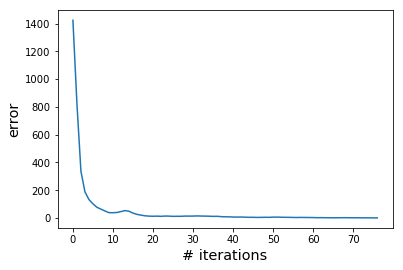

In [14]:
plt.plot(err_history)
plt.xlabel('# iterations')
plt.ylabel('error')

# (c)

In [15]:
dists_list = []
dim = im_large.shape[0]
X_large = im_large.reshape(-1, 3)
for c in centroids:
    ds = np.sqrt(np.sum((X_large - c) ** 2, axis=1))
    dists_list.append(ds)
assign = np.stack(dists_list).argmin(axis=0)

In [16]:
assign.shape

(262144,)

In [17]:
compressed = np.zeros_like(X_large)
for k in range(num_clusters):
    idxes = np.where(assign == k)[0]
    compressed[idxes] = centroids[k]

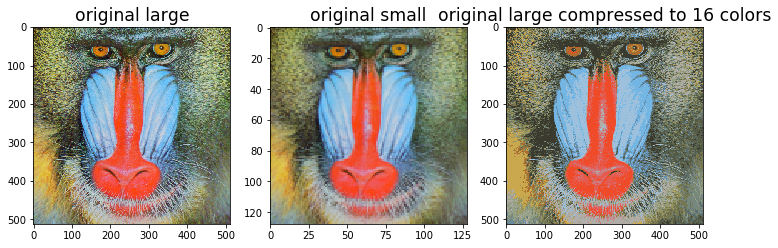

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax0, ax1, ax2 = axes.ravel()

ax0.imshow(im_large)
ax0.set_title('original large')
ax1.imshow(im_small)
ax1.set_title('original small')
ax2.imshow(compressed.reshape(dim, dim, 3))
ax2.set_title('original large compressed to 16 colors')

The clustered one looks better than the small version of the picture even with just 16 colors!

# (d)

In [19]:
X_large.shape

(262144, 3)

Number of colors used for each version of the picture:

In [20]:
np.__version__

'1.12.1'

In [21]:
# original large
# np.unique(X_large, axis=0).shape: np.unique is not added untill numpy 1.13.0
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html
pd.DataFrame(X_large).drop_duplicates().shape

(230427, 3)

In [22]:
# original small
pd.DataFrame(X).drop_duplicates().shape

(16057, 3)

In [23]:
# compressed large
pd.DataFrame(compressed).drop_duplicates().shape

(16, 3)

So compared to the original large picture, the compression factor is on the order of magnitude of 1.4e4 (230427 / 16.), impressive!